In [1]:
from pathlib import Path
import sys
sys.path.append('../bitome-kb/')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.sparse as sparse
import seaborn as sns
from bitome.core import Bitome
from Bio.SeqFeature import FeatureLocation
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
from Bio.Seq import Seq

from math import log,exp,inf
bitome = Bitome.init_from_file('../bitome-kb/bitome.pkl')

In [2]:
gene_tu_map = []
for g in bitome.genes:
    if len(g.transcription_units) < 1:
        continue
        
    for tu in g.transcription_units:
        data = {}
        data['gene_name'] = g.name
        data['gene_id'] = g.locus_tag
        data['tu_name'] = tu.name
        data['tu_id'] = tu.id
        gene_tu_map.append(data)
gene_tu_pd = pd.DataFrame(gene_tu_map)

In [4]:
gene_tu_pd.to_csv('data/Fur_multistrain_SN/gene_tu_mapping.csv',index = None)

# genebank to bitome object
## prioritize K12:  AP009048/ CP000948/ U00096

In [2]:
##K 12 strains
bitome_AP009048 = Bitome(Path('data/e_coli_genomes', 'AP009048.gbk'))
bitome_AP009048.load_data(regulon_db=False)

bitome_CP000948 = Bitome(Path('data/e_coli_genomes', 'CP000948.gbk'))
bitome_CP000948.load_data(regulon_db=False)

bitome_U00096 = Bitome(Path('data/e_coli_genomes', 'U00096.gbk'))
bitome_U00096.load_data(regulon_db=False)

In [3]:
bitome_AE005174 = Bitome(Path('data/e_coli_genomes', 'AE005174.gbk'))
bitome_AE005174.load_data(regulon_db=False)

bitome_AE014073 = Bitome(Path('data/e_coli_genomes', 'AE014073.gbk'))
bitome_AE014073.load_data(regulon_db=False)

bitome_AE014075 = Bitome(Path('data/e_coli_genomes', 'AE014075.gbk'))
bitome_AE014075.load_data(regulon_db=False)

In [3]:
bitome_CP000802 = Bitome(Path('data/e_coli_genomes', 'CP000802.gbk'))
bitome_CP000802.load_data(regulon_db=False)

bitome_CP000946 = Bitome(Path('data/e_coli_genomes', 'CP000946.gbk'))
bitome_CP000946.load_data(regulon_db=False)

bitome_CP000970 = Bitome(Path('data/e_coli_genomes', 'CP000970.gbk'))
bitome_CP000970.load_data(regulon_db=False)

bitome_CP001637 = Bitome(Path('data/e_coli_genomes', 'CP001637.gbk'))
bitome_CP001637.load_data(regulon_db=False)

bitome_CP001665 = Bitome(Path('data/e_coli_genomes', 'CP001665.gbk'))
bitome_CP001665.load_data(regulon_db=False)

bitome_CP002967 = Bitome(Path('data/e_coli_genomes', 'CP002967.gbk'))
bitome_CP002967.load_data(regulon_db=False)

In [3]:
def revstrand(inseq):
    outseq=inseq[::-1]
    return outseq

def complement(inseq):
    inseq.upper()
    clist=[]
    for ntide in inseq:
        if ntide == 'A':
            clist.append('T')
        if ntide == 'C':
            clist.append('G')
        if ntide == 'G':
            clist.append('C')
        if ntide == 'T':
            clist.append('A')
    complement=''.join(clist)
    return complement

#calculate hamming distance
def hmd(seq1,seq2):
    hamd = 0
    for i in range(0,len(seq1)):
        if seq1[i] != seq2[i]:
            hamd += 1
    return hamd

def score_motif(s, M):
        if len(s) != len(M):
            return -inf
        
        out = 0
        for i in range( len(s)):
            if s[i] == 'N':
                out = out + (M[i]['A'] + M[i]['C'] + M[i]['G']+M[i]['T'])/4
            else:
                out = out + M[i][s[i]]
        return out

## read in blast result: hits_AE014073

In [4]:
def read_blast( fname ):
    hits = {}
    ffile = open(fname, "rt")
    lines = ffile.readlines()
    ffile.close()
    for line in lines:
        if line[0] != '"':
            continue    
        sline = line.replace('"','').strip()
        sline_list = sline.split('\t')
        if sline_list[0] not in hits.keys():
            hits[ sline_list[0] ] = {'TU_id': sline_list[0] ,'subject': sline_list[1],
                                     'q_start':int(sline_list[8]),'q_end':int(sline_list[9]),
                                     'length':int(sline_list[3]) }
    return hits   

In [6]:
hits_AE014073 = read_blast( 'blast_fasta/ecoli_AE014073_blast.txt')
TU_AE014073 = []

for g in bitome.genes:
    if len(g.transcription_units) < 1:
        continue
        
    for tu in g.transcription_units:
        if tu.id not in hits_AE014073.keys():
            continue
        if tu.tss==None:
            continue
        
        data = {}
        data['ID'] = g.locus_tag
        data['gene'] = g.name
        data['TU'] = tu.name
        data['TU_id'] = tu.id
        data['strand'] = tu.location.strand
        if data['strand'] == 1:
            data['TSS_pred'] = hits_AE014073[tu.id]['q_start']
        else:
            data['TSS_pred'] = hits_AE014073[tu.id]['q_start']
            
        data['start'] = hits_AE014073[tu.id]['q_start']
        data['end'] = hits_AE014073[tu.id]['q_end']
        data['length'] = hits_AE014073[tu.id]['length']
        TU_AE014073.append(data)

In [7]:
TU_AE014073_table = pd.DataFrame(TU_AE014073)
TU_AE014073_table.head()

,ID,gene,TU,TU_id,strand,TSS_pred,start,end,length
0,b0001,thrL,thrLABC,ECK120009369,1,148,148,5075,4929
1,b0001,thrL,thrL,ECK125145761,1,148,148,464,318
2,b0002,thrA,thrLABC,ECK120009369,1,148,148,5075,4929
3,b0003,thrB,thrLABC,ECK120009369,1,148,148,5075,4929
4,b0004,thrC,thrLABC,ECK120009369,1,148,148,5075,4929


In [8]:
ref_tu_length=[]
for g in bitome.genes:
    if len(g.transcription_units) < 1:
        continue
        
    for tu in g.transcription_units:
        if tu.id not in list(TU_AE014073_table['TU_id']):
            continue
        ref_tu_length.append( len(tu.sequence) )

Text(0.5, 1.0, 'TU_match_AE014073')

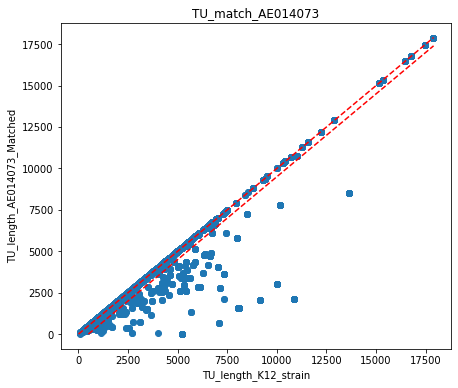

In [12]:
plt.figure(figsize=(7,6))
plt.scatter(ref_tu_length, list(TU_AE014073_table['length']) )
plt.plot(np.arange(0,18000,100),np.arange(0,18000,100),'r--')
x = np.arange(500,18000,100)
y = np.array([i - 500 for i in x])
plt.plot(x,y,'r--')
plt.xlabel('TU_length_K12_strain')
plt.ylabel('TU_length_AE014073_Matched')
plt.title('TU_match_AE014073')

# Sigma 70: -10 and -35 box: hits_AE005174

In [5]:
prib_sig = {'Sigma70':[],'Sigma32':[],'Sigma38':[],'Sigma24':[],'Sigma28':[],'Sigma54':[]}
m35_sig = {'Sigma70':[],'Sigma32':[],'Sigma38':[],'Sigma24':[],'Sigma28':[],'Sigma54':[]}
for p in bitome.promoters:
    for k in prib_sig.keys():
        if p.sigma_factors == [k]:
            if p.box_10_location != None:
                prib_sig[k].append(p)
            if p.box_35_location != None:
                m35_sig[k].append(p)
                
M_prib = {'Sigma70':[],'Sigma32':[],'Sigma38':[],'Sigma24':[],'Sigma28':[],'Sigma54':[]}
M_m35 = {'Sigma70':[],'Sigma32':[],'Sigma38':[],'Sigma24':[],'Sigma28':[],'Sigma54':[]}
for k in M_prib.keys():
    if k == 'Sigma70':
        M_prib[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(6)]
        M_m35[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(6)]
    elif k == 'Sigma32':
        M_prib[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(6)]
        M_m35[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(7)]
    elif k == 'Sigma38':
        M_prib[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(11)]
        M_m35[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(6)]
    elif k == 'Sigma24':
        M_prib[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(7)]
        M_m35[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(7)]
    elif k == 'Sigma28':
        M_prib[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(8)]
        M_m35[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(6)]
    elif k == 'Sigma54':
        M_prib[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(5)]
        M_m35[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(6)]

for k in M_prib.keys():
    for p in prib_sig[k]:
        if int(p.box_10_location.strand) == -1:
            s = complement(revstrand( str(bitome.sequence)[ int(p.box_10_location.start):int(p.box_10_location.end)] ))
        else:
            s = str(bitome.sequence)[ int(p.box_10_location.start):int(p.box_10_location.end)]
           
        if len(s) != len(M_prib[k]):
            continue
            
        for i in range(len(s)):
            M_prib[k][i][s[i]] = M_prib[k][i][s[i]] + 1
        
        if int(p.box_35_location.strand) == -1:
            s2 = complement(revstrand( str(bitome.sequence)[ int(p.box_35_location.start):int(p.box_35_location.end)] ))
        else:
            s2 = str(bitome.sequence)[ int(p.box_35_location.start):int(p.box_35_location.end)]
            
        if len(s2) != len(M_m35[k]):
            continue
            
        for i in range(len(s2)):
            M_m35[k][i][s2[i]] = M_m35[k][i][s2[i]] + 1          
            
for k in M_prib.keys():
    for i in range(len(M_prib[k])):
        SUM = M_prib[k][i]['A']+M_prib[k][i]['C']+M_prib[k][i]['G']+M_prib[k][i]['T']+4 # avoid log(0)
        for nu in ['A','C','G','T']:
            M_prib[k][i][nu] = log( (M_prib[k][i][nu]+1)/ SUM )
                    
for k in M_m35.keys():
    for i in range(len(M_m35[k])):
        SUM = M_m35[k][i]['A']+M_m35[k][i]['C']+M_m35[k][i]['G']+M_m35[k][i]['T'] + 4
        for nu in ['A','C','G','T']:
            M_m35[k][i][nu] = log( (M_m35[k][i][nu]+1)/ SUM )
            
M_prib['Sigma38'] = M_prib['Sigma38'][4:11]

m10_seq = { 'Sigma70':'TATAAT','Sigma38':'CTATACT','Sigma32':'CCCCAT','Sigma24':'TGTCAAA','Sigma28':'GCCGATAA','Sigma54':'TGCAT'}
m35_seq = { 'Sigma70':'TTGACA','Sigma38':'TTGACA','Sigma32':'CTTGAAA','Sigma24':'TGAACTT','Sigma28':'CTAAAG','Sigma54':'TGGCAC'}

In [6]:
def score_pribnow_m35(TSS:int,strand, bitome_object, signame:str, M_prib:dict, M_m35:dict,m10_seq:dict,m35_seq:dict ):
    
    prib_length = len( M_prib[signame] )
    m35_length = len( M_m35[signame] )
        
    if int(strand) == -1:
        flag = False
    else:
        flag = True
        
    if flag:
        prib_s = str(bitome_object.sequence)[TSS-20:TSS]
        m35_s = str(bitome_object.sequence)[TSS-40:TSS-20]
    else:
        prib_s = complement(revstrand( str(bitome_object.sequence)[TSS:TSS+20] ))
        m35_s = complement(revstrand( str(bitome_object.sequence)[TSS+20:TSS+40] ))
        
    prib_min_hmd_index = []
    prib_hmind = []
    prib_score = []
    m35_min_hmd_index = []
    m35_hmind = []
    m35_score = []
    #pribnow
    for i in range(0,20-prib_length+1):
        prib_hmind.append( hmd( prib_s[i:i+prib_length] , m10_seq[signame] ) )
            
    prib_hmin = min(prib_hmind)
    for i in range(0,20-prib_length+1):
        if prib_hmind[i] == prib_hmin:
            prib_min_hmd_index.append(i)
            
    for j in range( len(prib_min_hmd_index)):
        prib_score.append( score_motif( prib_s[prib_min_hmd_index[j]:prib_min_hmd_index[j]+prib_length], M_prib[signame] ) )
        
    prib_max_score = max(prib_score)
    
    for j in range ( len(prib_min_hmd_index) ):
        if prib_score[j] == prib_max_score:
            index = prib_min_hmd_index[j]
            pbox = index -20
            prib_string = prib_s[index:(index+ prib_length)]
            break
                
    #m35 box
    for i in range(0,20-m35_length+1):
        m35_hmind.append( hmd( m35_s[i:i+m35_length] , m35_seq[signame] ) )
            
    m35_hmin = min(m35_hmind)
    for i in range(0,20-m35_length+1):
        if m35_hmind[i] == m35_hmin:
            m35_min_hmd_index.append(i)
                
    for j in range( len(m35_min_hmd_index)):
        m35_score.append( score_motif( m35_s[m35_min_hmd_index[j]:m35_min_hmd_index[j]+m35_length], M_m35[signame] ) )
            
    m35_max_score = max(m35_score)
    
    for j in range ( len(m35_min_hmd_index) ):
        if m35_score[j] == m35_max_score:
            index = m35_min_hmd_index[j]
            mbox = index -40
            m35_string = m35_s[index:index+m35_length]
            break
    #spacer
    if flag:
        s = str(bitome_object.sequence)[TSS-40:TSS]
    else:
        s = complement(revstrand( str(bitome_object.sequence)[TSS:TSS+40] ))
            
    left = mbox + len( M_m35[signame] ) + 40
    right = pbox + 40
    spacer_length = right - left
    spacing = s[left:right]
    if spacer_length > 0:
        AT_ratio = ( spacing.count('A') + spacing.count('T') )/spacer_length
    else:
        AT_ratio = 0
            
    if spacer_length < 7:
        hepta_ratio = AT_ratio
    else:
        at=[]
        for i in range(0, spacer_length+1-7):
            at.append( (spacing[i:i+7].count('A') + spacing[i:i+7].count('T'))/7 )
        max_at = max(at)
        hepta_ratio = max_at
        
        
    
        
    result = {signame+'_Matched_Prib':prib_string,signame + '_Prib_Start':pbox,
                 signame+'_Prib_score':prib_max_score,signame +'_Prib_hmd':prib_hmin,
                 signame+'_Matched_m35':m35_string, signame+'_m35_Start':mbox,
                  signame+'_m35_score':m35_max_score, signame+'_m35_hmd':m35_hmin,
                  signame+'_Spacer_Length': spacer_length, signame+'_Spacer_AT_ratio':AT_ratio,
                 signame+'_hepta_ratio':hepta_ratio}
        
    return result

In [11]:
sigma = []
for i in range(len(TU_AE014073_table['ID'])):
    data={}
    data['ID'] = list(TU_AE014073_table['ID'])[i]
    data['TU'] = list(TU_AE014073_table['TU'])[i]
    data['TU_id'] = list(TU_AE014073_table['TU_id'])[i]
    data['strand'] = list(TU_AE014073_table['strand'])[i]
    for signame in m10_seq.keys():
        data.update( score_pribnow_m35(list(TU_AE014073_table['TSS_pred'])[i],data['strand'],bitome_AE014073,
                                  signame, M_prib, M_m35,m10_seq,m35_seq ))
    sigma.append(data)

In [12]:
sigma_pd = pd.DataFrame(sigma)
sigma_pd.head()

,ID,TU,TU_id,strand,Sigma70_Matched_Prib,Sigma70_Prib_Start,Sigma70_Prib_score,Sigma70_Prib_hmd,Sigma70_Matched_m35,Sigma70_m35_Start,...,Sigma54_Prib_Start,Sigma54_Prib_score,Sigma54_Prib_hmd,Sigma54_Matched_m35,Sigma54_m35_Start,Sigma54_m35_score,Sigma54_m35_hmd,Sigma54_Spacer_Length,Sigma54_Spacer_AT_ratio,Sigma54_hepta_ratio
0,b0001,thrLABC,ECK120009369,1,TATAGG,-8,-7.762165,2,TTGACT,-38,...,-20,-6.991379,2,GGTCAC,-30,-8.45391,2,4,1.0,1.0
1,b0001,thrL,ECK125145761,1,TATAGG,-8,-7.762165,2,TTGACT,-38,...,-20,-6.991379,2,GGTCAC,-30,-8.45391,2,4,1.0,1.0
2,b0002,thrLABC,ECK120009369,1,TATAGG,-8,-7.762165,2,TTGACT,-38,...,-20,-6.991379,2,GGTCAC,-30,-8.45391,2,4,1.0,1.0
3,b0003,thrLABC,ECK120009369,1,TATAGG,-8,-7.762165,2,TTGACT,-38,...,-20,-6.991379,2,GGTCAC,-30,-8.45391,2,4,1.0,1.0
4,b0004,thrLABC,ECK120009369,1,TATAGG,-8,-7.762165,2,TTGACT,-38,...,-20,-6.991379,2,GGTCAC,-30,-8.45391,2,4,1.0,1.0


Text(0.5, 0.98, 'E. coli: AE005174 ')

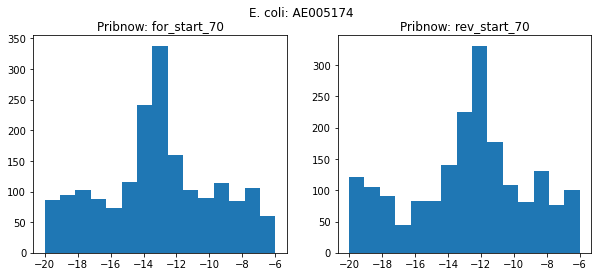

In [14]:
rev_start_70 = []
for_start_70 = []
for i in range(len(sigma_pd['ID'])):
    if sigma_pd['strand'][i] == 1:
        for_start_70.append(sigma_pd['Sigma70_Prib_Start'][i])
    else:
        rev_start_70.append(sigma_pd['Sigma70_Prib_Start'][i])

fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
ax0.hist(for_start_70,bins=15)
ax0.set_title('Pribnow: for_start_70')
ax1.hist(rev_start_70,bins=15)
ax1.set_title('Pribnow: rev_start_70')
fig.suptitle('E. coli: AE005174 ')

Text(0.5, 0.98, 'E. coli: AE005174 ')

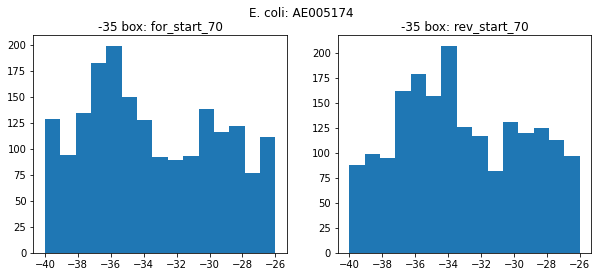

In [15]:
rev_start_70 = []
for_start_70 = []
for i in range(len(sigma_pd['ID'])):
    if sigma_pd['strand'][i] == 1:
        for_start_70.append(sigma_pd['Sigma70_m35_Start'][i])
    else:
        rev_start_70.append(sigma_pd['Sigma70_m35_Start'][i])

fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
ax0.hist(for_start_70,bins=15)
ax0.set_title('-35 box: for_start_70')
ax1.hist(rev_start_70,bins=15)
ax1.set_title('-35 box: rev_start_70')
fig.suptitle('E. coli: AE005174 ')

Text(0.5, 0.98, 'E. coli: AE005174 ')

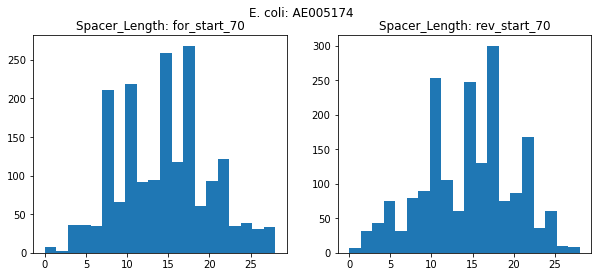

In [16]:
rev_start_70 = []
for_start_70 = []
for i in range(len(sigma_pd['ID'])):
    if sigma_pd['strand'][i] == 1:
        for_start_70.append(sigma_pd['Sigma70_Spacer_Length'][i])
    else:
        rev_start_70.append(sigma_pd['Sigma70_Spacer_Length'][i])

fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
ax0.hist(for_start_70,bins=20)
ax0.set_title('Spacer_Length: for_start_70')
ax1.hist(rev_start_70,bins=20)
ax1.set_title('Spacer_Length: rev_start_70')
fig.suptitle('E. coli: AE005174 ')

### shape feature around TSS (shigella flexneri)

In [9]:
helt = pd.read_pickle('../../K12DNA_structure/ecoli_AE014073/ecoli_AE014073_helt.pickle')
mgw = pd.read_pickle('../../K12DNA_structure/ecoli_AE014073/ecoli_AE014073_mgw.pickle')
roll =  pd.read_pickle('../../K12DNA_structure/ecoli_AE014073/ecoli_AE014073_roll.pickle')

In [16]:
TU_AE014073_table.head()

,ID,gene,TU,TU_id,strand,TSS_pred,start,end,length
0,b0001,thrL,thrLABC,ECK120009369,1,148,148,5075,4929
1,b0001,thrL,thrL,ECK125145761,1,148,148,464,318
2,b0002,thrA,thrLABC,ECK120009369,1,148,148,5075,4929
3,b0003,thrB,thrLABC,ECK120009369,1,148,148,5075,4929
4,b0004,thrC,thrLABC,ECK120009369,1,148,148,5075,4929


In [19]:
count = 0
N_up = 300
N_down = 200
helt_list = []
mgw_list = []
roll_list = []
for i in range( len(TU_AE014073_table['ID']) ):
    tss = int(TU_AE014073_table['TSS_pred'][i])
    if tss < 300:
        continue
        
    strand = int(TU_AE014073_table['strand'][i])
    if strand == 1:
        start = tss - N_up
        end = tss + N_down+1
    else:
        start = tss - N_down
        end = tss + N_up+1
        
    helt_temp = helt[start:end]
    mgw_temp = mgw[start:end]
    roll_temp = roll[start:end]
    if strand == -1:
        helt_temp.reverse()
        mgw_temp.reverse()
        roll_temp.reverse()
        
    helt_list.append(helt_temp)
    mgw_list.append(mgw_temp)
    roll_list.append(roll_temp)

helt_avg = [0 for i in range(N_up+N_down+1)]
mgw_avg = [0 for i in range(N_up+N_down+1)]
roll_avg = [0 for i in range(N_up+N_down+1)]

for i in range(len(mgw_list)):
    helt_temp = helt_list[i]
    if 'NA' in helt_temp:
        continue
    else:
        for j in range(N_up+N_down+1):
            helt_avg[j] = helt_avg[j] + float(helt_temp[j])/len(helt_list)
        
    mgw_temp = mgw_list[i]
    if 'NA' in mgw_temp:
        continue
    else:
        for j in range(N_up+N_down+1):
            mgw_avg[j] = mgw_avg[j] + float(mgw_temp[j])/len(mgw_list)
            
    roll_temp = roll_list[i]
    if 'NA' in roll_temp:
        count = count + 1
        continue
    else:
        for j in range(N_up+N_down+1):
            roll_avg[j] = roll_avg[j] + float(roll_temp[j])/len(roll_list)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'MGW tss region for ecoli_AE014073')

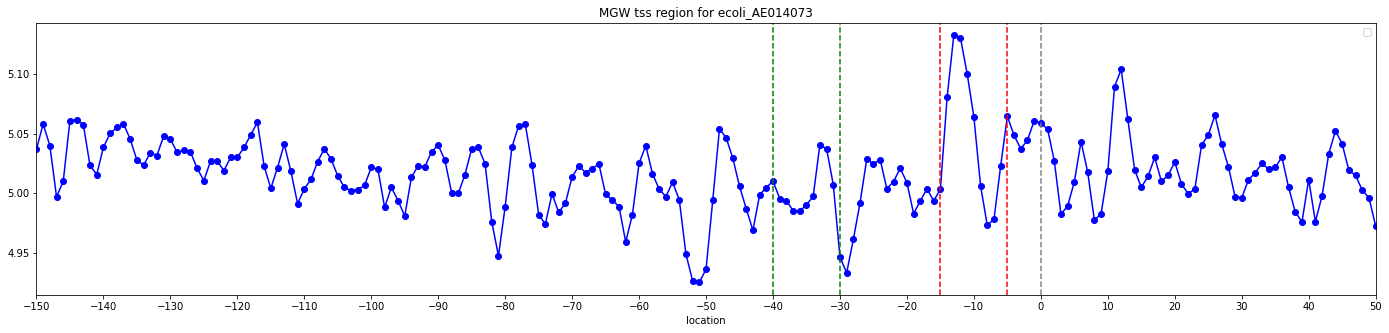

In [35]:
x_loc = list(np.arange(-N_up,N_down+1, 1))
plt.figure(figsize=(24,5))
plt.plot(x_loc,mgw_avg,'bo-')
plt.xticks(np.arange(-N_up, N_down+1, 10))
plt.axvline(0, linestyle='--', color='gray')
plt.axvline(-5, linestyle='--', color='red')
plt.axvline(-15, linestyle='--', color='red')
plt.axvline(-30, linestyle='--', color='g')
plt.axvline(-40, linestyle='--', color='g')
plt.xlabel('location')
plt.xlim((-150,50))
plt.legend()
plt.title('MGW tss region for ecoli_AE014073')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'HelT tss region for ecoli_AE014073')

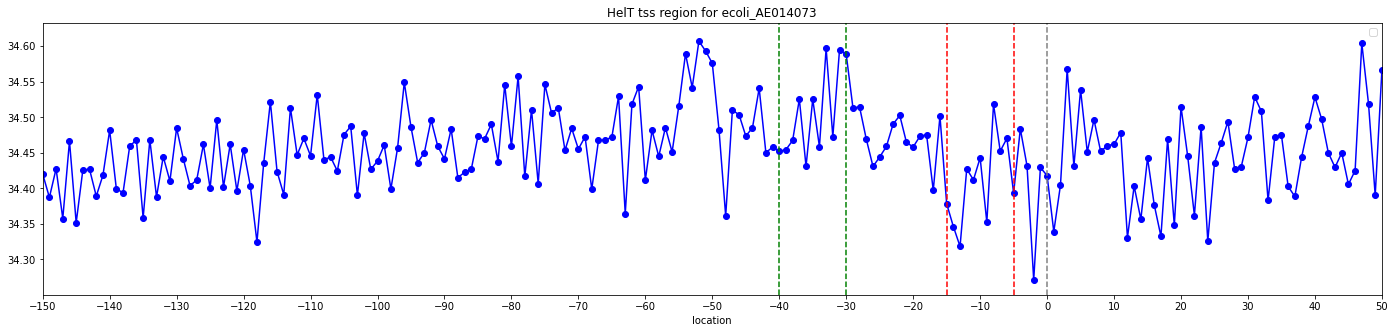

In [28]:
xticks = list(np.arange(-N_up,N_down+1, 1))
plt.figure(figsize=(24,5))
plt.plot(xticks,helt_avg,'bo-')
plt.xticks(np.arange(-N_up, N_down+1, 10))
plt.axvline(0, linestyle='--', color='gray')
plt.axvline(-5, linestyle='--', color='red')
plt.axvline(-15, linestyle='--', color='red')
plt.axvline(-30, linestyle='--', color='g')
plt.axvline(-40, linestyle='--', color='g')
plt.xlabel('location')
plt.xlim((-150,50))
plt.legend()
plt.title('HelT tss region for ecoli_AE014073')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'ROLL tss region for ecoli_AE014073')

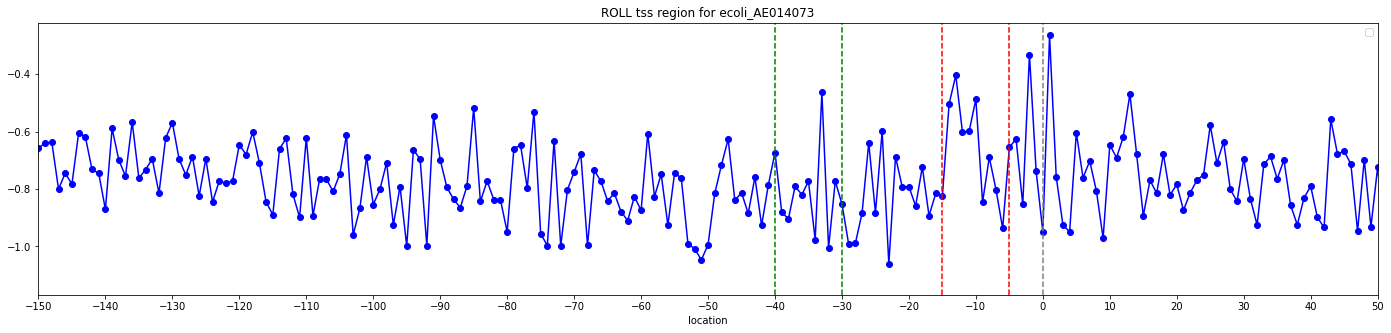

In [30]:
xticks = list(np.arange(-N_up,N_down+1, 1))
plt.figure(figsize=(24,5))
plt.plot(xticks,roll_avg,'bo-')
plt.xticks(np.arange(-N_up, N_down+1, 10))
plt.axvline(0, linestyle='--', color='gray')
plt.axvline(-5, linestyle='--', color='red')
plt.axvline(-15, linestyle='--', color='red')
plt.axvline(-30, linestyle='--', color='g')
plt.axvline(-40, linestyle='--', color='g')
plt.xlabel('location')
plt.xlim((-150,50))
plt.legend()
plt.title('ROLL tss region for ecoli_AE014073')

# Escherichia coli str. K-12 substr. MG1655 (U00096)

In [7]:
hits_U00096 = read_blast( 'blast_fasta/ecoli_U00096_blast.txt')
TU_U00096 = []

for g in bitome.genes:
    if len(g.transcription_units) < 1:
        continue
        
    for tu in g.transcription_units:
        if tu.id not in hits_U00096.keys():
            continue
        if tu.tss==None:
            continue
        
        data = {}
        data['ID'] = g.locus_tag
        data['gene'] = g.name
        data['TU'] = tu.name
        data['TU_id'] = tu.id
        data['strand'] = tu.location.strand
        if data['strand'] == 1:
            data['TSS_pred'] = hits_U00096[tu.id]['q_start']
        else:
            data['TSS_pred'] = hits_U00096[tu.id]['q_start']
            
        data['start'] = hits_U00096[tu.id]['q_start']
        data['end'] = hits_U00096[tu.id]['q_end']
        data['length'] = hits_U00096[tu.id]['length']
        TU_U00096.append(data)

TU_U00096_table = pd.DataFrame(TU_U00096)
TU_U00096_table.head()

,ID,gene,TU,TU_id,strand,TSS_pred,start,end,length
0,b0001,thrL,thrLABC,ECK120009369,1,148,148,5076,4929
1,b0001,thrL,thrL,ECK125145761,1,148,148,465,318
2,b0002,thrA,thrLABC,ECK120009369,1,148,148,5076,4929
3,b0003,thrB,thrLABC,ECK120009369,1,148,148,5076,4929
4,b0004,thrC,thrLABC,ECK120009369,1,148,148,5076,4929


Text(0.5, 1.0, 'TU_match_U00096')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


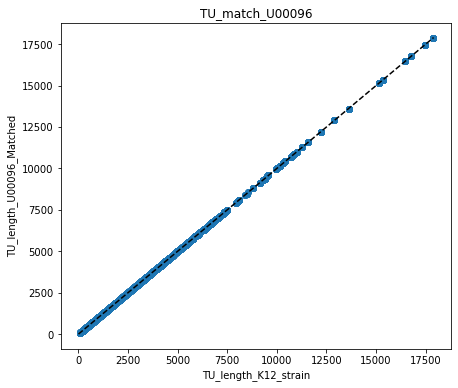

In [8]:
ref_tu_length=[]
for g in bitome.genes:
    if len(g.transcription_units) < 1:
        continue
        
    for tu in g.transcription_units:
        if tu.id not in list(TU_U00096_table['TU_id']):
            continue
        ref_tu_length.append( len(tu.sequence) )

plt.figure(figsize=(7,6))
plt.scatter(ref_tu_length, list(TU_U00096_table['length']))
plt.plot(np.arange(0,18000,100),np.arange(0,18000,100),'k--')
plt.xlabel('TU_length_K12_strain')
plt.ylabel('TU_length_U00096_Matched')
plt.title('TU_match_U00096')

In [9]:
sigma_U00096 = []
for i in range(len(TU_U00096_table['ID'])):
    data={}
    data['ID'] = list(TU_U00096_table['ID'])[i]
    data['TU'] = list(TU_U00096_table['TU'])[i]
    data['TU_id'] = list(TU_U00096_table['TU_id'])[i]
    data['strand'] = list(TU_U00096_table['strand'])[i]
    for signame in m10_seq.keys():
        data.update( score_pribnow_m35(list(TU_U00096_table['TSS_pred'])[i],data['strand'],bitome_U00096,
                                  signame, M_prib, M_m35,m10_seq,m35_seq ))
    sigma_U00096.append(data)

sigma_pd_U00096 = pd.DataFrame(sigma_U00096)
sigma_pd_U00096.head()

,ID,TU,TU_id,strand,Sigma70_Matched_Prib,Sigma70_Prib_Start,Sigma70_Prib_score,Sigma70_Prib_hmd,Sigma70_Matched_m35,Sigma70_m35_Start,...,Sigma54_Prib_Start,Sigma54_Prib_score,Sigma54_Prib_hmd,Sigma54_Matched_m35,Sigma54_m35_Start,Sigma54_m35_score,Sigma54_m35_hmd,Sigma54_Spacer_Length,Sigma54_Spacer_AT_ratio,Sigma54_hepta_ratio
0,b0001,thrLABC,ECK120009369,1,TATAGG,-8,-7.762165,2,TTGACT,-38,...,-20,-6.991379,2,GGTCAC,-30,-8.45391,2,4,1.0,1.0
1,b0001,thrL,ECK125145761,1,TATAGG,-8,-7.762165,2,TTGACT,-38,...,-20,-6.991379,2,GGTCAC,-30,-8.45391,2,4,1.0,1.0
2,b0002,thrLABC,ECK120009369,1,TATAGG,-8,-7.762165,2,TTGACT,-38,...,-20,-6.991379,2,GGTCAC,-30,-8.45391,2,4,1.0,1.0
3,b0003,thrLABC,ECK120009369,1,TATAGG,-8,-7.762165,2,TTGACT,-38,...,-20,-6.991379,2,GGTCAC,-30,-8.45391,2,4,1.0,1.0
4,b0004,thrLABC,ECK120009369,1,TATAGG,-8,-7.762165,2,TTGACT,-38,...,-20,-6.991379,2,GGTCAC,-30,-8.45391,2,4,1.0,1.0


Text(0.5, 0.98, 'Escherichia coli str. K-12 substr. MG1655')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


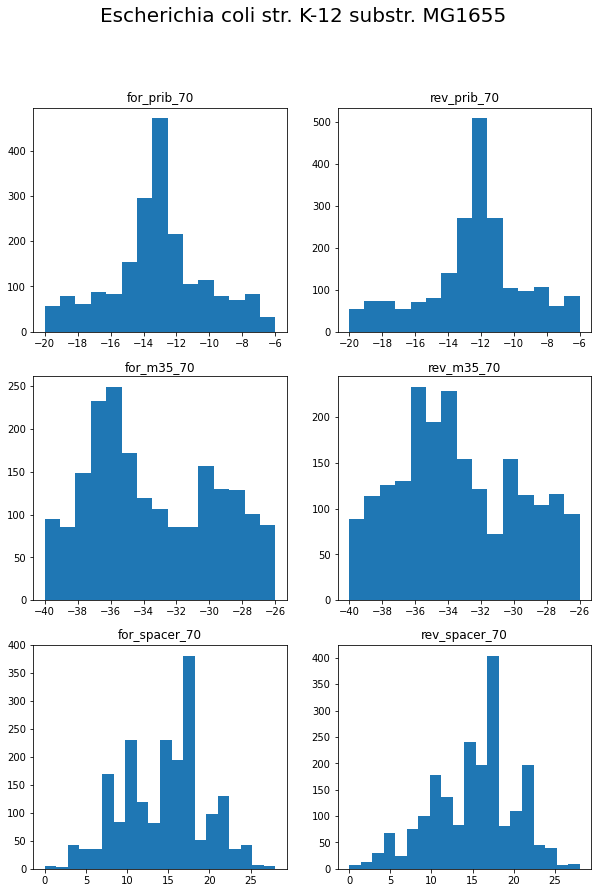

In [10]:
rev_prib_70 = []
for_prib_70 = []
rev_m35_70 = []
for_m35_70 = []
rev_sp_70 = []
for_sp_70 = []

for i in range(len(sigma_pd_U00096['ID'])):
    if sigma_pd_U00096['strand'][i] == 1:
        for_prib_70.append(sigma_pd_U00096['Sigma70_Prib_Start'][i])
        for_m35_70.append(sigma_pd_U00096['Sigma70_m35_Start'][i])
        for_sp_70.append(sigma_pd_U00096['Sigma70_Spacer_Length'][i])
    else:
        rev_prib_70.append(sigma_pd_U00096['Sigma70_Prib_Start'][i])
        rev_m35_70.append(sigma_pd_U00096['Sigma70_m35_Start'][i])
        rev_sp_70.append(sigma_pd_U00096['Sigma70_Spacer_Length'][i])       
        
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6) ) = plt.subplots(3, 2,figsize=(10,14))
ax1.hist(for_prib_70,bins=15)
ax1.set_title('for_prib_70')
ax2.hist(rev_prib_70,bins=15)
ax2.set_title('rev_prib_70')
ax3.hist(for_m35_70,bins=15)
ax3.set_title('for_m35_70')
ax4.hist(rev_m35_70,bins=15)
ax4.set_title('rev_m35_70')
ax5.hist(for_sp_70,bins=20)
ax5.set_title('for_spacer_70')
ax6.hist(rev_sp_70,bins=20)
ax6.set_title('rev_spacer_70')
fig.suptitle('Escherichia coli str. K-12 substr. MG1655',fontsize =20)

Text(0.5, 1.0, 'rev_m35_70')

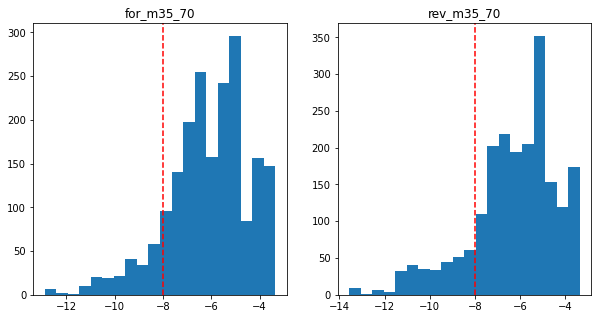

In [13]:
for_m35score_70=[]
rev_m35score_70=[]
for i in range(len(sigma_pd_U00096['ID'])):
    if sigma_pd_U00096['strand'][i] == 1:
        for_m35score_70.append(sigma_pd_U00096['Sigma70_m35_score'][i])
    else:
        rev_m35score_70.append(sigma_pd_U00096['Sigma70_m35_score'][i])

fig, (ax1,ax2 ) = plt.subplots(1,2 ,figsize=(10,5))
ax1.hist(for_m35score_70,bins=20)
ax1.axvline(-8, linestyle='--', color='red')
ax1.set_title('for_m35_70')
ax2.hist(rev_m35score_70,bins=20)
ax2.axvline(-8, linestyle='--', color='red')
ax2.set_title('rev_m35_70')

In [9]:
helt_U00096 = pd.read_pickle('../../K12DNA_structure/ecoli_U00096/ecoli_U00096_helt.pickle')

N_up = 300
N_down = 200
helt_list = []
for i in range( len(TU_U00096_table['ID']) ):
    tss = int(TU_U00096_table['TSS_pred'][i])
    if tss < 300:
        continue
        
    strand = int(TU_U00096_table['strand'][i])
    if strand == 1:
        start = tss - N_up
        end = tss + N_down+1
    else:
        start = tss - N_down
        end = tss + N_up+1
        
    helt_temp = helt_U00096[start:end]
    if strand == -1:
        helt_temp.reverse()
        
    helt_list.append(helt_temp)

helt_avg = [0 for i in range(N_up+N_down+1)]
for i in range(len(helt_list)):
    helt_temp = helt_list[i]
    if 'NA' in helt_temp:
        continue
    else:
        for j in range(N_up+N_down+1):
            helt_avg[j] = helt_avg[j] + float(helt_temp[j])/len(helt_list)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'HelT tss region for ecoli_U00096')

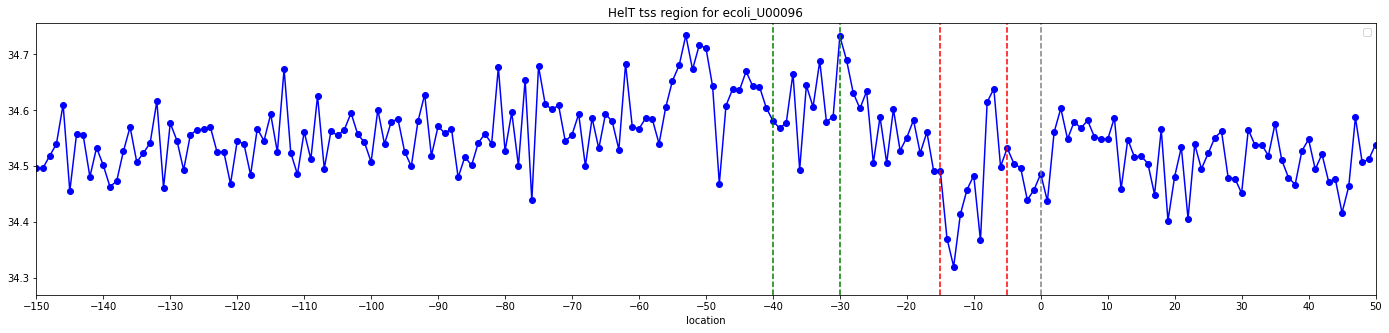

In [20]:
xticks = list(np.arange(-N_up,N_down+1, 1))
plt.figure(figsize=(24,5))
plt.plot(xticks,helt_avg,'bo-')
plt.xticks(np.arange(-N_up, N_down+1, 10))
plt.axvline(0, linestyle='--', color='gray')
plt.axvline(-5, linestyle='--', color='red')
plt.axvline(-15, linestyle='--', color='red')
plt.axvline(-30, linestyle='--', color='g')
plt.axvline(-40, linestyle='--', color='g')
plt.xlabel('location')
plt.xlim((-150,50))
plt.legend()
plt.title('HelT tss region for ecoli_U00096')

# Escherichia coli str. K-12 substr. DH10B(CP000948)

In [8]:
hits_CP000948 = read_blast( 'blast_fasta/ecoli_CP000948_blast.txt')
TU_CP000948 = []

for g in bitome.genes:
    if len(g.transcription_units) < 1:
        continue
        
    for tu in g.transcription_units:
        if tu.id not in hits_CP000948.keys():
            continue
        if tu.tss==None:
            continue
        
        data = {}
        data['ID'] = g.locus_tag
        data['gene'] = g.name
        data['TU'] = tu.name
        data['TU_id'] = tu.id
        data['strand'] = tu.location.strand
        if data['strand'] == 1:
            data['TSS_pred'] = hits_CP000948[tu.id]['q_start']
        else:
            data['TSS_pred'] = hits_CP000948[tu.id]['q_start']
            
        data['start'] = hits_CP000948[tu.id]['q_start']
        data['end'] = hits_CP000948[tu.id]['q_end']
        data['length'] = hits_CP000948[tu.id]['length']
        TU_CP000948.append(data)

TU_CP000948_table = pd.DataFrame(TU_CP000948)
TU_CP000948_table.head()

,ID,gene,TU,TU_id,strand,TSS_pred,start,end,length
0,b0001,thrL,thrLABC,ECK120009369,1,148,148,5076,4929
1,b0001,thrL,thrL,ECK125145761,1,148,148,465,318
2,b0002,thrA,thrLABC,ECK120009369,1,148,148,5076,4929
3,b0003,thrB,thrLABC,ECK120009369,1,148,148,5076,4929
4,b0004,thrC,thrLABC,ECK120009369,1,148,148,5076,4929


Text(0.5, 1.0, 'TU_match_CP000948')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


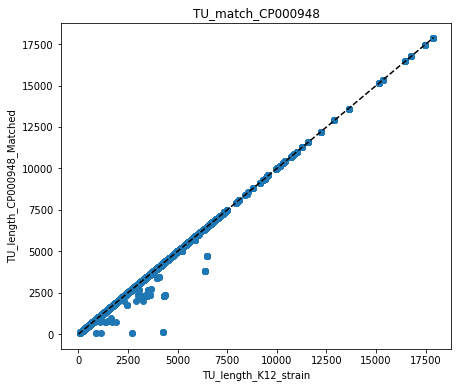

In [9]:
ref_tu_length=[]
for g in bitome.genes:
    if len(g.transcription_units) < 1:
        continue
        
    for tu in g.transcription_units:
        if tu.id not in list(TU_CP000948_table['TU_id']):
            continue
        ref_tu_length.append( len(tu.sequence) )

plt.figure(figsize=(7,6))
plt.scatter(ref_tu_length, list(TU_CP000948_table['length']))
plt.plot(np.arange(0,18000,100),np.arange(0,18000,100),'k--')
plt.xlabel('TU_length_K12_strain')
plt.ylabel('TU_length_CP000948_Matched')
plt.title('TU_match_CP000948')

In [10]:
sigma_CP000948 = []
for i in range(len(TU_CP000948_table['ID'])):
    data={}
    data['ID'] = list(TU_CP000948_table['ID'])[i]
    data['TU'] = list(TU_CP000948_table['TU'])[i]
    data['TU_id'] = list(TU_CP000948_table['TU_id'])[i]
    data['strand'] = list(TU_CP000948_table['strand'])[i]
    for signame in m10_seq.keys():
        data.update( score_pribnow_m35(list(TU_CP000948_table['TSS_pred'])[i],data['strand'],bitome_CP000948,
                                  signame, M_prib, M_m35,m10_seq,m35_seq ))
    sigma_CP000948.append(data)

sigma_pd_CP000948 = pd.DataFrame(sigma_CP000948)
sigma_pd_CP000948.head()

,ID,TU,TU_id,strand,Sigma70_Matched_Prib,Sigma70_Prib_Start,Sigma70_Prib_score,Sigma70_Prib_hmd,Sigma70_Matched_m35,Sigma70_m35_Start,...,Sigma54_Prib_Start,Sigma54_Prib_score,Sigma54_Prib_hmd,Sigma54_Matched_m35,Sigma54_m35_Start,Sigma54_m35_score,Sigma54_m35_hmd,Sigma54_Spacer_Length,Sigma54_Spacer_AT_ratio,Sigma54_hepta_ratio
0,b0001,thrLABC,ECK120009369,1,TATAGG,-8,-7.762165,2,TTGACT,-38,...,-20,-6.991379,2,GGTCAC,-30,-8.45391,2,4,1.0,1.0
1,b0001,thrL,ECK125145761,1,TATAGG,-8,-7.762165,2,TTGACT,-38,...,-20,-6.991379,2,GGTCAC,-30,-8.45391,2,4,1.0,1.0
2,b0002,thrLABC,ECK120009369,1,TATAGG,-8,-7.762165,2,TTGACT,-38,...,-20,-6.991379,2,GGTCAC,-30,-8.45391,2,4,1.0,1.0
3,b0003,thrLABC,ECK120009369,1,TATAGG,-8,-7.762165,2,TTGACT,-38,...,-20,-6.991379,2,GGTCAC,-30,-8.45391,2,4,1.0,1.0
4,b0004,thrLABC,ECK120009369,1,TATAGG,-8,-7.762165,2,TTGACT,-38,...,-20,-6.991379,2,GGTCAC,-30,-8.45391,2,4,1.0,1.0


Text(0.5, 0.98, 'Escherichia coli str. K-12 substr. DH10B')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


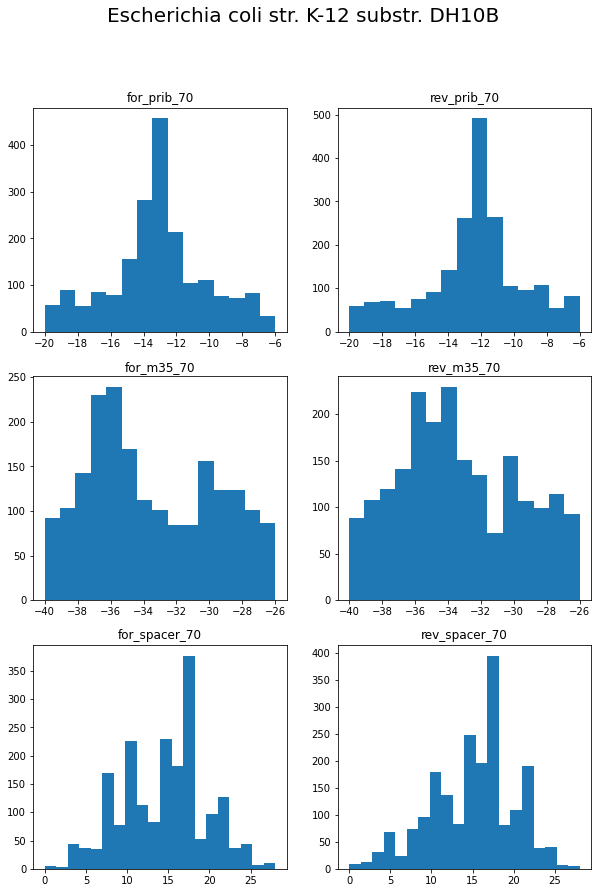

In [11]:
rev_prib_70 = []
for_prib_70 = []
rev_m35_70 = []
for_m35_70 = []
rev_sp_70 = []
for_sp_70 = []

for i in range(len(sigma_pd_CP000948['ID'])):
    if sigma_pd_CP000948['strand'][i] == 1:
        for_prib_70.append(sigma_pd_CP000948['Sigma70_Prib_Start'][i])
        for_m35_70.append(sigma_pd_CP000948['Sigma70_m35_Start'][i])
        for_sp_70.append(sigma_pd_CP000948['Sigma70_Spacer_Length'][i])
    else:
        rev_prib_70.append(sigma_pd_CP000948['Sigma70_Prib_Start'][i])
        rev_m35_70.append(sigma_pd_CP000948['Sigma70_m35_Start'][i])
        rev_sp_70.append(sigma_pd_CP000948['Sigma70_Spacer_Length'][i])       
        
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6) ) = plt.subplots(3, 2,figsize=(10,14))
ax1.hist(for_prib_70,bins=15)
ax1.set_title('for_prib_70')
ax2.hist(rev_prib_70,bins=15)
ax2.set_title('rev_prib_70')
ax3.hist(for_m35_70,bins=15)
ax3.set_title('for_m35_70')
ax4.hist(rev_m35_70,bins=15)
ax4.set_title('rev_m35_70')
ax5.hist(for_sp_70,bins=20)
ax5.set_title('for_spacer_70')
ax6.hist(rev_sp_70,bins=20)
ax6.set_title('rev_spacer_70')
fig.suptitle('Escherichia coli str. K-12 substr. DH10B',fontsize =20)

## linear matching TU in bitome

In [7]:
tu_info=[]
for tu in bitome.transcription_units:
    data={}
    data['TU_name'] = tu.name
    data['ID'] = tu.id
    data['strand'] = tu.location.strand
    data['seq'] = str(tu.sequence)
    tu_info.append(data)
tu_pd = pd.DataFrame(tu_info)
tu_pd.head()

,TU_name,ID,strand,seq
0,astCADBE,ECK120008913,-1,AAATAACGAATTATTTACTGTAGAGGTCGCTATGTCTCAGCCAATT...
1,astCADBE,ECK120008914,-1,ACAGCGCAAACATTACTTATTATTAACATATAAATAACGAATTATT...
2,astCADBE,ECK120008915,-1,GCAAACATTACTTATTATTAACATATAAATAACGAATTATTTACTG...
3,nrdHIEF,ECK120008916,1,ATCAACAGAGAGACAACCCGACGCGTATCATCGCGCCGTATCTTCA...
4,cpxPQ,ECK120008917,1,GTTGAATCGCGACAGAAAGATTTTGGGAGCAAATGATGCGCATAGT...


In [8]:
tu_records=[]
for tu in bitome.transcription_units:
    tu_records.append(  SeqRecord(Seq( str(tu.sequence) ), id = tu.id, name = tu.name, description='') )
    
SeqIO.write(tu_records,'blast_fasta/tu_k12.fasta','fasta')

3560

In [4]:
#K12 strains:  AP009048/ CP000948/ U00096
AP009048_records = [ SeqRecord(Seq( str(bitome_AP009048.sequence) ), id = 'ecoli_AP009048', name = 'ecoli_AP009048', description='') ]
SeqIO.write(AP009048_records,'blast_fasta/ecoli_AP009048.fasta','fasta')

CP000948_records = [ SeqRecord(Seq( str(bitome_CP000948.sequence) ), id = 'ecoli_CP000948', name = 'ecoli_CP000948', description='') ]
SeqIO.write(CP000948_records,'blast_fasta/ecoli_CP000948.fasta','fasta')

U00096_records = [ SeqRecord(Seq( str(bitome_U00096.sequence) ), id = 'ecoli_U00096', name = 'ecoli_U00096', description='') ]
SeqIO.write(U00096_records,'blast_fasta/ecoli_U00096.fasta','fasta')

1

In [10]:
AE005174_records = [ SeqRecord(Seq( str(bitome_AE005174.sequence) ), id = 'ecoli_AE005174', name = 'ecoli_AE005174', description='') ]
SeqIO.write(AE005174_records,'blast_fasta/ecoli_AE005174.fasta','fasta')

AE014073_records = [ SeqRecord(Seq( str(bitome_AE014073.sequence) ), id = 'ecoli_AE014073', name = 'ecoli_AE014073', description='') ]
SeqIO.write(AE014073_records,'blast_fasta/ecoli_AE014073.fasta','fasta')

AE014075_records = [ SeqRecord(Seq( str(bitome_AE014075.sequence) ), id = 'ecoli_AE014075', name = 'ecoli_AE014075', description='') ]
SeqIO.write(AE014075_records,'blast_fasta/ecoli_AE014075.fasta','fasta')

1

In [6]:
# CP000802, CP000946,CP000970,CP001637,CP001665,CP002967
CP000802_records = [ SeqRecord(Seq( str(bitome_CP000802.sequence) ), id = 'ecoli_CP000802', name = 'ecoli_CP000802', description='') ]
SeqIO.write(CP000802_records,'blast_fasta/ecoli_CP000802.fasta','fasta')

CP000946_records = [ SeqRecord(Seq( str(bitome_CP000946.sequence) ), id = 'ecoli_CP000946', name = 'ecoli_CP000946', description='') ]
SeqIO.write(CP000946_records,'blast_fasta/ecoli_CP000946.fasta','fasta')

CP000970_records = [ SeqRecord(Seq( str(bitome_CP000970.sequence) ), id = 'ecoli_CP000970', name = 'ecoli_CP000970', description='') ]
SeqIO.write(CP000970_records,'blast_fasta/ecoli_CP000970.fasta','fasta')

CP001637_records = [ SeqRecord(Seq( str(bitome_CP001637.sequence) ), id = 'ecoli_CP001637', name = 'ecoli_CP001637', description='') ]
SeqIO.write(CP001637_records,'blast_fasta/ecoli_CP001637.fasta','fasta')

CP001665_records = [ SeqRecord(Seq( str(bitome_CP001665.sequence) ), id = 'ecoli_CP001665', name = 'ecoli_CP001665', description='') ]
SeqIO.write(CP001665_records,'blast_fasta/ecoli_CP001665.fasta','fasta')

CP002967_records = [ SeqRecord(Seq( str(bitome_CP002967.sequence) ), id = 'ecoli_CP002967', name = 'ecoli_CP002967', description='') ]
SeqIO.write(CP002967_records,'blast_fasta/ecoli_CP002967.fasta','fasta')

1